In [16]:
import numpy as np
from matplotlib import pyplot as plt
import string

In [17]:
pii=[]
lines=[]
with open('initialStateDistribution.txt') as isd:
    lines=isd.readlines()
for line in lines:
    pii.append(float(line[:-1]))

In [18]:
with open('emissionMatrix.txt') as em:
    temp=[line.split('\t') for line in em.read().splitlines()]
bij=np.array(temp).astype('float')

In [19]:
with open('transitionMatrix.txt') as em:
    temp=[line.split(' ')[:-1] for line in em.read().splitlines()]
aij=np.array(temp).astype('float')

In [20]:
with open('observations.txt') as obsv:
    temp=[line.split(' ') for line in obsv.read().splitlines()]
Ot=np.array(temp[0][:-1]).astype('int')

In [21]:
pii=np.reshape(pii,(-1,1))

In [22]:
def ml_state_sequence(pii,aij,bij,Ot):
    lstar=np.zeros([np.shape(pii)[0],np.shape(Ot)[0]]).astype('float')
    lstar[:,0]=(np.log(pii)+np.log(bij[:,Ot[0]]).reshape((-1,1))).reshape((-1,))
    for i in range(1,len(Ot)):
        lstar[:,i]=np.max(lstar[:,i-1].reshape(-1,1)+np.log(aij),axis=0).reshape((-1,))+np.log(bij[:,Ot[i]]).reshape((-1,))
    return lstar

In [23]:
lstar=ml_state_sequence(pii,aij,bij,Ot)

In [24]:
def most_likely_state(lstar,aij):
    St=np.zeros((lstar.shape[1],)).astype('int')
    St[-1]=np.argmax(lstar[:,-1],axis=0)
    print(St)
    for i in range(lstar.shape[1]-2,-1,-1):
        St[i]=np.argmax(lstar[:,i]+np.log(aij[:,St[i+1]]),axis=0)
    return St

[ 0  0  0 ...  0  0 17]


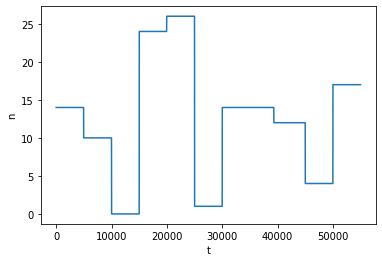

In [25]:
speech=most_likely_state(lstar,aij)
plt.figure()
plt.plot(speech)
plt.xlabel('t')
plt.ylabel('n')
plt.savefig('speech.png')


In [26]:
word=[x for x in speech[4000:-1:5000]]

In [27]:
alphabets=list(string.ascii_lowercase)
alphabets.append(' ')
print(word)
speech=[]
for i,s in enumerate(word):
    speech.append(alphabets[s])

[14, 10, 0, 24, 26, 1, 14, 14, 12, 4, 17]


In [29]:
print(speech)

['o', 'k', 'a', 'y', ' ', 'b', 'o', 'o', 'm', 'e', 'r']
